<a href="https://colab.research.google.com/github/ameliavasiliu/linearModels/blob/main/lab/lab_notebook_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

# 1

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv('pierce_county_house_sales.csv')

In [11]:
data.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [12]:
data['sale_price'].describe()

,sale_price
count,1.681400e+04
mean,4.612332e+05
std,2.360833e+05
min,2.000000e+03
25%,3.480000e+05
50%,4.165000e+05
75%,5.238065e+05
max,6.130000e+06


In [13]:
data['hvac_description'].unique()

array(['Warm and Cool Air Zone', 'Forced Air', 'Electric Baseboard',
       'Heat Pump', 'Floor/Wall Furnace', 'No Heat', 'Electric',
       'Hot Water Baseboard', nan, 'Floor Wall Furnace'], dtype=object)

In [14]:
data['exterior'].unique()

array(['Frame Siding', 'Frame Vinyl', 'Masonry Concrete Block',
       'Masonry Common Brick', 'Frame Stucco', 'Finished Cottage',
       'Frame Hardboard', 'Frame Rustic Log', 'Log', 'Unfinished Cottage',
       'Pine Finished Cabin', 'Cedar Finished Cabin', nan,
       'Cedar A-Frame', 'Pine A-Frame', 'Cedar Unfinished Cabin',
       'Pine Unfinished Cabin'], dtype=object)

In [15]:
data['interior'].unique()

array(['Drywall', nan, 'Paneling'], dtype=object)

In [16]:
data['year_built'].describe()

,year_built
count,16814.000000
mean,1980.469252
std,33.339025
min,1880.000000
25%,1959.000000
50%,1990.000000
75%,2006.000000
max,2021.000000


In [17]:
data['waterfront_type'].unique()

array([nan, 'WF Lake', 'WF Salt', 'WF Stream/Creek', 'WF River'],
      dtype=object)

In [18]:
def clean_waterfront_type(waterfront_type):
  if waterfront_type in [np.nan]:
    return 'No waterfront'
  else:
    return waterfront_type

data['waterfront_type'] = data['waterfront_type'].apply(clean_waterfront_type)

In [19]:
data['waterfront_type'].unique()

array(['No waterfront', 'WF Lake', 'WF Salt', 'WF Stream/Creek',
       'WF River'], dtype=object)

In [20]:
data['view_quality'].unique() # want to combine some view quality categories

array([nan, 'View Avg', 'View Lim -', 'View Lim', 'View Good',
       'View Avg +', 'View Lim +', 'View V-Good', 'View Good +'],
      dtype=object)

In [21]:
# combining some of the view quality categories so that it is easier to categorize

def combine_view_quality(view_quality):
    if view_quality in ['View Avg +', 'View Avg']:
        return 'View Avg'
    elif view_quality in ['View Lim -', 'View Lim +', 'View Lim']:
        return 'View Lim'
    elif view_quality in ['View Good', 'View V-Good', 'View Good +']:
        return 'View Good'
    else:
        return view_quality

data['view_quality'] = data['view_quality'].apply(combine_view_quality)
print(data['view_quality'].unique())

[nan 'View Avg' 'View Lim' 'View Good']


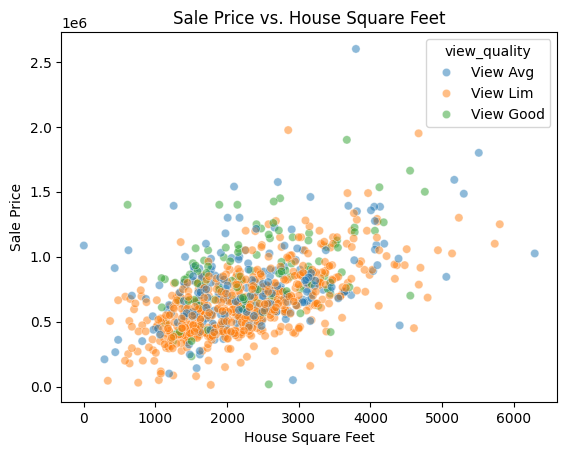

In [22]:
sns.scatterplot(x = 'house_square_feet', y = 'sale_price', data = data, hue = 'view_quality', alpha = 0.5)
plt.title('Sale Price vs. House Square Feet')
plt.xlabel('House Square Feet')
plt.ylabel('Sale Price')
plt.show()

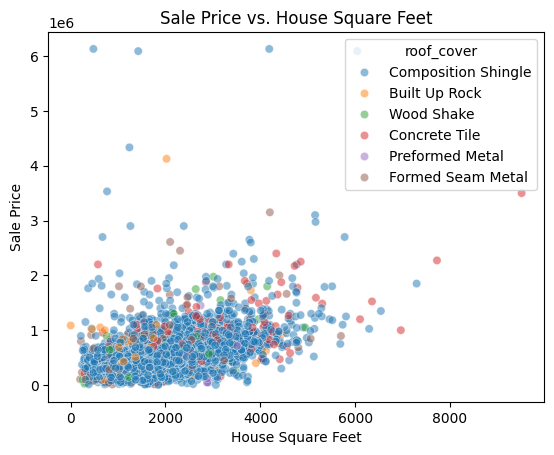

In [23]:
sns.scatterplot(x = 'house_square_feet', y = 'sale_price', data = data, hue = 'roof_cover', alpha = 0.5)
plt.title('Sale Price vs. House Square Feet')
plt.xlabel('House Square Feet')
plt.ylabel('Sale Price')
plt.show()

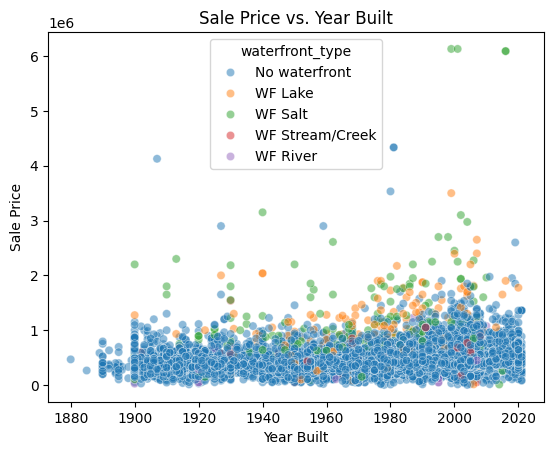

In [24]:
sns.scatterplot(x = 'year_built', y = 'sale_price', data = data, hue = "waterfront_type", alpha = 0.5)
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

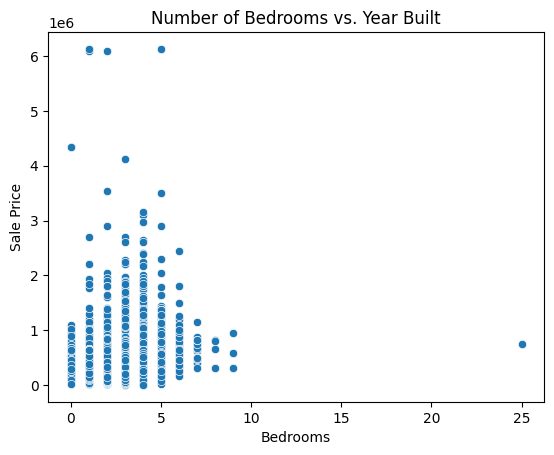

In [25]:
sns.scatterplot(x = 'bedrooms', y = 'sale_price', data = data)
plt.title('Number of Bedrooms vs. Year Built')
plt.xlabel('Bedrooms')
plt.ylabel('Sale Price')
plt.show()

# 2

In [26]:
data['waterfront_type'].fillna(data['waterfront_type'].mode()[0], inplace=True)
data['view_quality'].fillna(data['view_quality'].mode()[0], inplace=True)

<ipython-input-26-17bcf418b2db>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['waterfront_type'].fillna(data['waterfront_type'].mode()[0], inplace=True)
<ipython-input-26-17bcf418b2db>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [27]:
data = data.dropna()

In [28]:
df_encoded = pd.get_dummies(data, columns=['hvac_description', 'exterior', 'interior',
                                          'roof_cover', 'utility_sewer', 'waterfront_type', 'view_quality'],
                            drop_first=True)

df_encoded.head()

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,stories,year_built,...,utility_sewer_SEWER/SEPTIC AVAIL,utility_sewer_SEWER/SEPTIC INSTALLED,utility_sewer_SEWER/SEPTIC NO,utility_sewer_SEWER/SEPTIC NO PERC,waterfront_type_WF Lake,waterfront_type_WF River,waterfront_type_WF Salt,waterfront_type_WF Stream/Creek,view_quality_View Good,view_quality_View Lim
0,2020-01-02,380000,2157,0,0,528,0,0,2,1993,...,False,True,False,False,False,False,False,False,False,True
1,2020-01-02,383000,2238,0,0,396,0,0,2,2017,...,False,True,False,False,False,False,False,False,False,True
2,2020-01-01,419900,1452,0,0,0,0,1,1,1965,...,False,True,False,False,False,False,False,False,False,True
3,2020-01-02,251660,832,0,0,0,0,0,1,1919,...,False,True,False,False,False,False,False,False,False,True
4,2020-01-02,500000,1780,0,384,484,0,1,1,1955,...,False,True,False,False,False,False,False,False,False,True


# 3

In [29]:
# defining our features (X) and the target variable (y)

X = df_encoded.drop(columns = ['sale_price', 'sale_date']) #taking out sale date as I think year made is a better representative
y = df_encoded['sale_price']

#splitting the data into 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# checking our dimensions
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (13437, 49)
Testing data shape: (3360, 49)


# 4

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# defining the model
model = LinearRegression()

# fitting the model to the training data that was split earlier
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# running predictions on both the training and test data - trying to predict our target variable
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
# need to evaluate the performance of the model on train and test data by computing rmse and r^2
train_rmse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training R^2:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R^2:", test_r2)

Training RMSE: 25478600930.10595
Training R^2: 0.5418622369747497
Test RMSE: 25663217020.919888
Test R^2: 0.5048518319252517


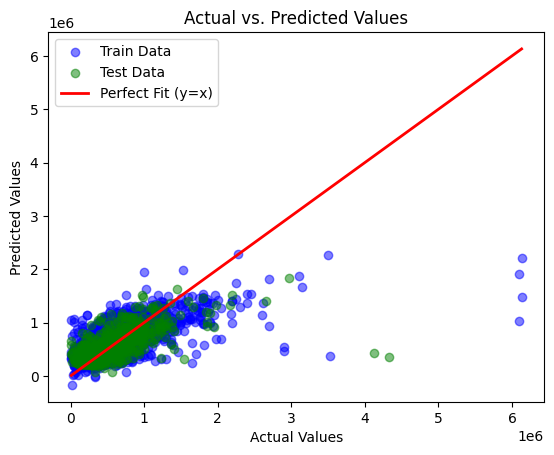

In [34]:
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data', alpha=0.5)
plt.scatter(y_test, y_test_pred, color='green', label='Test Data', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label="Perfect Fit (y=x)")
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

This simple model appears to be overfitting and performing poorly on both the training and test data.

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [36]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [37]:
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

In [38]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

In [39]:
print("Polynomial Model Training RMSE:", train_rmse)
print("Polynomial Model Training R^2:", train_r2)
print("Polynomial Model Test RMSE:", test_rmse)
print("Polynomial Model Test R^2:", test_r2)

Polynomial Model Training RMSE: 130177.12188029637
Polynomial Model Training R^2: 0.6952877983009588
Polynomial Model Test RMSE: 827594.4032421935
Polynomial Model Test R^2: -12.214756651397426


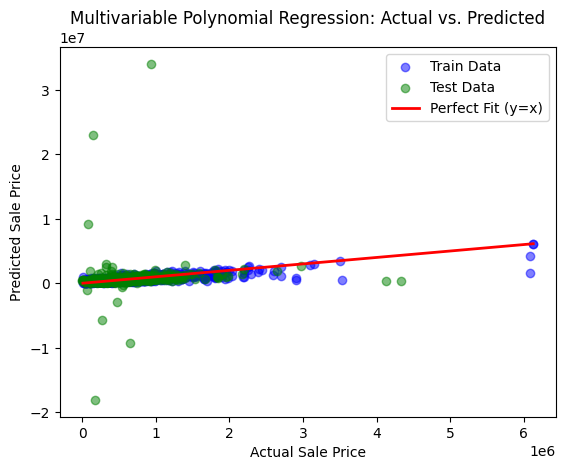

In [40]:
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data', alpha=0.5)
plt.scatter(y_test, y_test_pred, color='green', label='Test Data', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label="Perfect Fit (y=x)")
plt.title("Multivariable Polynomial Regression: Actual vs. Predicted")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.legend()
plt.show()

Polynomial regression with degree 2 fits the model much better than the regression with 1 degree.

# 5

In [42]:
numeric_cols = ['sale_price', 'house_square_feet', 'attic_finished_square_feet',
                'basement_square_feet', 'attached_garage_square_feet',
                'detached_garage_square_feet', 'fireplaces', 'stories',
                'year_built', 'bedrooms', 'bathrooms']

df_numeric = df_encoded[numeric_cols]
df_numeric.dropna(inplace=True)

<ipython-input-42-23e2507c8bc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)


In [45]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.0 MB/s eta 0:00:00


In [48]:
import pingouin as pg
partial_corr_matrix = pd.DataFrame(index=numeric_cols, columns=numeric_cols)

In [49]:
for var1 in numeric_cols:
    for var2 in numeric_cols:
        if var1 != var2:
            result = pg.partial_corr(data=df_numeric, x=var1, y=var2, covar=[col for col in numeric_cols if col != var1 and col != var2])
            partial_corr_matrix.loc[var1, var2] = result['r'][0]
partial_corr_matrix = partial_corr_matrix.astype(float)

<ipython-input-49-36b6e4279f82>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_corr_matrix.loc[var1, var2] = result['r'][0]
<ipython-input-49-36b6e4279f82>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_corr_matrix.loc[var1, var2] = result['r'][0]
<ipython-input-49-36b6e4279f82>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partial_corr_matrix.loc[var1, var2] = result['r'][0]
<ipython-input-49-36b6e4279f82>:6:

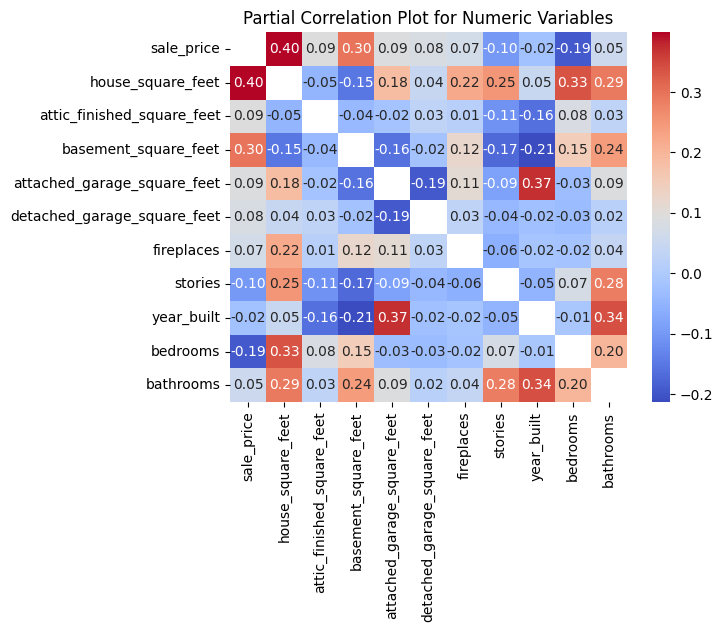

In [52]:
sns.heatmap(partial_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Partial Correlation Plot for Numeric Variables")
plt.show()

I notice that variables like sale price and housr square feet have a higher correlation as well as year built and attatched garage square feet.

# 6

In [61]:
X_train['house_square_feet_log'] = np.log(X_train['house_square_feet'] + 1)  # +1 to avoid log(0)
X_test['house_square_feet_log'] = np.log(X_test['house_square_feet'] + 1)

In [62]:
X_train['attached_garage_square_feet_log'] = np.log(X_train['attached_garage_square_feet'] + 1)
X_test['attached_garage_square_feet_log'] = np.log(X_test['attached_garage_square_feet'] + 1)

# interaction bewteen house sq feet and garage sq feet
X_train['house_and_garage'] = X_train['house_square_feet_log'] * X_train['attached_garage_square_feet_log']
X_test['house_and_garage'] = X_test['house_square_feet_log'] * X_test['attached_garage_square_feet_log']

In [63]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [64]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [65]:
poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)
X_train_poly = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_feature_names)

In [66]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [67]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)


In [68]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Training RMSE: 127231.5893824891
Test RMSE: 250414.18317579236
Training R^2: 0.7089213049197338
Test R^2: -0.20987896572992581


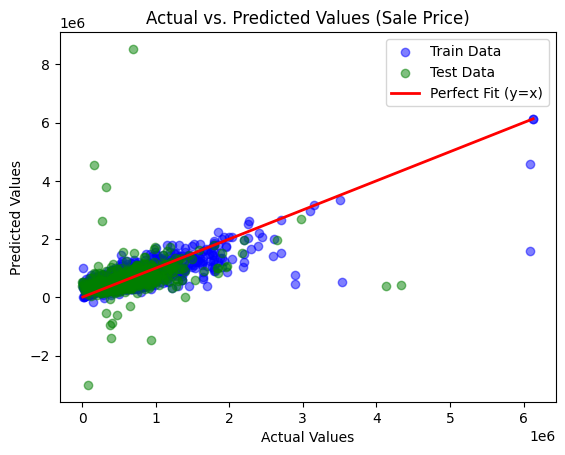

In [69]:
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data', alpha=0.5)
plt.scatter(y_test, y_test_pred, color='green', label='Test Data', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2, label="Perfect Fit (y=x)")
plt.title("Actual vs. Predicted Values (Sale Price)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

# 7

By adding log transformations, interaction terms, and polynomial features, the model got significantly improved at predicting sale prices, lowering both MSE and RMSE. The polynomial regression outperformed the simpler linear models because it captured the non-linear relationships in the data. This showed that adding complexity can help reduce underfitting and capture more of the patterns. In the end, the final model with those extra features worked best without overfitting.